Import Packages

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the Data

In [3]:
parent_dir = '../../../data/bnd_buffer/1/'

NP = 500
NC = 500
IPP = 1_000
BB = 600
ITERATIONS = 10
# Load Scala benchmark data
scala_idle_raw_data = pd.read_csv(f'{parent_dir}3/prod_cons_akka_actor_benchmark_idle_power.csv')
scala_bench_raw_data = pd.read_csv(f'{parent_dir}3/prod_cons_akka_actor_benchmark_power_metrics.csv')

# Load Erlang benchmark data
erlang_idle_raw_data = pd.read_csv(f'{parent_dir}3/prod_cons_bounded_buffer_benchmark_idle_power.csv')
erlang_bench_raw_data = pd.read_csv(f'{parent_dir}3/prod_cons_bounded_buffer_benchmark_power_metrics.csv')

# Replace empty or missing values with "N/A" in non-numeric columns
scala_idle_raw_data.fillna("N/A", inplace=True)
scala_bench_raw_data.fillna("N/A", inplace=True)
erlang_idle_raw_data.fillna("N/A", inplace=True)
erlang_bench_raw_data.fillna("N/A", inplace=True)


Preview the Data

In [4]:
print("Scala Idle Raw Data:")
print(scala_idle_raw_data.shape)
scala_idle_raw_data.head()

Scala Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sat Apr 12 15:46:43 2025 +0200) (509.59ms ela...,0.518,0.0000,0.314,0.87,0.22,16.89,61.02 C,Nominal
1,(Sat Apr 12 15:46:44 2025 +0200) (507.49ms ela...,1.670,0.0362,0.361,2.04,0.40,31.99,60.69 C,Nominal
2,(Sat Apr 12 15:46:44 2025 +0200) (508.02ms ela...,0.417,0.0000,0.285,0.63,0.21,15.59,60.69 C,Nominal
3,(Sat Apr 12 15:46:45 2025 +0200) (507.78ms ela...,0.343,0.0000,0.281,0.58,0.17,13.29,60.27 C,Nominal
4,(Sat Apr 12 15:46:45 2025 +0200) (507.83ms ela...,0.416,0.0000,0.285,0.65,0.20,15.05,60.27 C,Nominal


In [5]:
print("Scala Benchmark Raw Data:")
print(scala_bench_raw_data.shape)
scala_bench_raw_data.head()

Scala Benchmark Raw Data:
(101, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sat Apr 12 15:46:54 2025 +0200) (58.95ms elap...,37.8,0.0,1.720,39.02,3.98,99.59,58.21 C,Nominal
1,(Sat Apr 12 15:46:54 2025 +0200) (55.26ms elap...,35.4,0.0,1.160,36.24,4.00,100.00,58.21 C,Nominal
2,(Sat Apr 12 15:46:54 2025 +0200) (56.21ms elap...,37.0,0.0,1.050,37.86,4.01,100.16,58.21 C,Nominal
3,(Sat Apr 12 15:46:54 2025 +0200) (56.01ms elap...,38.0,0.0,1.140,38.86,3.99,99.89,58.21 C,Nominal
4,(Sat Apr 12 15:46:54 2025 +0200) (55.03ms elap...,38.7,0.0,0.754,39.77,3.91,98.30,58.21 C,Nominal


In [6]:
print("Erlang Idle Raw Data:")
print(erlang_idle_raw_data.shape)
erlang_idle_raw_data.head()

Erlang Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sat Apr 12 15:48:33 2025 +0200) (511.04ms ela...,0.3450,0.0000,0.309,0.48,0.14,12.14,51.61 C,Nominal
1,(Sat Apr 12 15:48:33 2025 +0200) (508.24ms ela...,0.2490,0.0379,0.452,0.49,0.19,15.79,51.61 C,Nominal
2,(Sat Apr 12 15:48:34 2025 +0200) (507.84ms ela...,0.9820,0.0000,0.294,1.10,0.20,15.49,51.57 C,Nominal
3,(Sat Apr 12 15:48:34 2025 +0200) (507.82ms ela...,0.0728,0.0000,0.263,0.11,0.05,2.73,51.57 C,Nominal
4,(Sat Apr 12 15:48:35 2025 +0200) (508.25ms ela...,0.0572,0.0000,0.269,0.11,0.04,2.46,51.52 C,Nominal


In [7]:
print("Erlang Benchmark Raw Data:")
print(erlang_bench_raw_data.shape)
erlang_bench_raw_data.head()

Erlang Benchmark Raw Data:
(238, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sat Apr 12 15:48:44 2025 +0200) (57.73ms elap...,29.3,0.0,0.361,29.48,3.96,99.20,50.77 C,Nominal
1,(Sat Apr 12 15:48:44 2025 +0200) (54.30ms elap...,29.2,0.0,0.357,30.08,4.00,100.14,51.82 C,Nominal
2,(Sat Apr 12 15:48:44 2025 +0200) (54.21ms elap...,28.2,0.0,0.363,28.75,3.89,98.37,51.82 C,Nominal
3,(Sat Apr 12 15:48:44 2025 +0200) (55.22ms elap...,29.1,0.0,0.382,29.40,4.01,100.31,51.82 C,Nominal
4,(Sat Apr 12 15:48:44 2025 +0200) (55.00ms elap...,29.0,0.0,0.341,29.53,3.95,98.95,51.82 C,Nominal


Clean the Data

In [8]:
def clean_data(df):
    df_copy = df.copy() 
    
    # Convert Timestamp to datetime format (extract date-time pattern)
    df_copy['Timestamp'] = pd.to_datetime(
        df['Timestamp'].str.extract(r'(\w{3} \w{3} \d{1,2} \d{2}:\d{2}:\d{2} \d{4})')[0], 
        errors='coerce'
    )

    # Extract elapsed time in milliseconds
    df_copy['Time Elapsed (ms)'] = pd.to_numeric(
        df['Timestamp'].str.extract(r'\((\d+\.\d+)ms elapsed\)')[0], 
        errors='coerce'
    )
    
    # Extract numeric temperature values
    df_copy['CPU Temp(C)'] = df['CPU Temp(C)'].str.extract(r'(\d+\.\d+|\d+)').astype(float)

    # Fill N/A values with 0 for numerical columns
    df_copy = df_copy.fillna(0)
    
    return df_copy

In [9]:
scala_idle_data = clean_data(scala_idle_raw_data)
scala_bench_data = clean_data(scala_bench_raw_data)
erlang_idle_data = clean_data(erlang_idle_raw_data)
erlang_bench_data = clean_data(erlang_bench_raw_data)

print(scala_idle_data.dtypes)
print(scala_bench_data.dtypes)
print(erlang_idle_data.dtypes)
print(erlang_bench_data.dtypes)

Timestamp                datetime64[ns]
CPU Core Power(W)               float64
GT Power(W)                     float64
DRAM Power(W)                   float64
(CPUs+GT+SA) Power(W)           float64
Avg Num Cores Active            float64
Cores Active(%)                 float64
CPU Temp(C)                     float64
Pressure Level                   object
Time Elapsed (ms)               float64
dtype: object
Timestamp                datetime64[ns]
CPU Core Power(W)               float64
GT Power(W)                     float64
DRAM Power(W)                   float64
(CPUs+GT+SA) Power(W)           float64
Avg Num Cores Active            float64
Cores Active(%)                 float64
CPU Temp(C)                     float64
Pressure Level                   object
Time Elapsed (ms)               float64
dtype: object
Timestamp                datetime64[ns]
CPU Core Power(W)               float64
GT Power(W)                     float64
DRAM Power(W)                   float64
(CPUs+GT+SA)

Verify Cleaned Data

In [10]:
print("Scala Idle Clean Data:")
print(scala_idle_data.shape)
scala_idle_data.head()

Scala Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-12 15:46:43,0.518,0.0000,0.314,0.87,0.22,16.89,61.02,Nominal,509.59
1,2025-04-12 15:46:44,1.670,0.0362,0.361,2.04,0.40,31.99,60.69,Nominal,507.49
2,2025-04-12 15:46:44,0.417,0.0000,0.285,0.63,0.21,15.59,60.69,Nominal,508.02
3,2025-04-12 15:46:45,0.343,0.0000,0.281,0.58,0.17,13.29,60.27,Nominal,507.78
4,2025-04-12 15:46:45,0.416,0.0000,0.285,0.65,0.20,15.05,60.27,Nominal,507.83


In [11]:
print("Scala Benchmark Clean Data:")
print(scala_bench_data.shape)
scala_bench_data.head()


Scala Benchmark Clean Data:
(101, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-12 15:46:54,37.8,0.0,1.720,39.02,3.98,99.59,58.21,Nominal,58.95
1,2025-04-12 15:46:54,35.4,0.0,1.160,36.24,4.00,100.00,58.21,Nominal,55.26
2,2025-04-12 15:46:54,37.0,0.0,1.050,37.86,4.01,100.16,58.21,Nominal,56.21
3,2025-04-12 15:46:54,38.0,0.0,1.140,38.86,3.99,99.89,58.21,Nominal,56.01
4,2025-04-12 15:46:54,38.7,0.0,0.754,39.77,3.91,98.30,58.21,Nominal,55.03


In [12]:
print("Erlang Idle Clean Data:")
print(erlang_idle_data.shape)
erlang_idle_data.head()


Erlang Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-12 15:48:33,0.3450,0.0000,0.309,0.48,0.14,12.14,51.61,Nominal,511.04
1,2025-04-12 15:48:33,0.2490,0.0379,0.452,0.49,0.19,15.79,51.61,Nominal,508.24
2,2025-04-12 15:48:34,0.9820,0.0000,0.294,1.10,0.20,15.49,51.57,Nominal,507.84
3,2025-04-12 15:48:34,0.0728,0.0000,0.263,0.11,0.05,2.73,51.57,Nominal,507.82
4,2025-04-12 15:48:35,0.0572,0.0000,0.269,0.11,0.04,2.46,51.52,Nominal,508.25


In [13]:
print("Erlang Benchmark Clean Data:")
print(erlang_bench_data.shape)
erlang_bench_data.head()

Erlang Benchmark Clean Data:
(238, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-12 15:48:44,29.3,0.0,0.361,29.48,3.96,99.20,50.77,Nominal,57.73
1,2025-04-12 15:48:44,29.2,0.0,0.357,30.08,4.00,100.14,51.82,Nominal,54.30
2,2025-04-12 15:48:44,28.2,0.0,0.363,28.75,3.89,98.37,51.82,Nominal,54.21
3,2025-04-12 15:48:44,29.1,0.0,0.382,29.40,4.01,100.31,51.82,Nominal,55.22
4,2025-04-12 15:48:44,29.0,0.0,0.341,29.53,3.95,98.95,51.82,Nominal,55.00


Visualize the Data

In [14]:
def plot_graphs(idle_df, bench_df, title_prefix):
    """
    Creates side-by-side subplots for each metric, plotting idle (left) and benchmark (right),
    using elapsed time on the x-axis.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    idle_df = idle_df.copy()
    bench_df = bench_df.copy()
    

    # Compute elapsed time starting from t=0
    idle_df["Elapsed Time (s)"] = (idle_df["Time Elapsed (ms)"].cumsum() - idle_df["Time Elapsed (ms)"].iloc[0]) / 1000
    bench_df["Elapsed Time (s)"] = (bench_df["Time Elapsed (ms)"].cumsum() - bench_df["Time Elapsed (ms)"].iloc[0]) / 1000

    for column in columns_to_plot:
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Plot Idle data on the first subplot
        sns.lineplot(data=idle_df, x="Elapsed Time (s)", y=column, label="Idle", color='blue', linestyle='--', ax=axes[0])
        axes[0].set_title(f"Idle - {column}", fontsize=12)
        axes[0].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[0].set_ylabel(column, fontsize=10)
        axes[0].legend()
        axes[0].grid(True)

        # Plot Benchmark data on the second subplot
        sns.lineplot(data=bench_df, x="Elapsed Time (s)", y=column, label="Benchmark", color='red', ax=axes[1])
        axes[1].set_title(f"Benchmark - {column}", fontsize=12)
        axes[1].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[1].set_ylabel(column, fontsize=10)
        axes[1].legend()
        axes[1].grid(True)

        # Main figure title
        fig.suptitle(f"{title_prefix} - {column}", fontsize=14)
        
        # Adjust layout to avoid overlap
        plt.tight_layout(rect=[0, 0, 1, 0.95]) 
        plt.show()


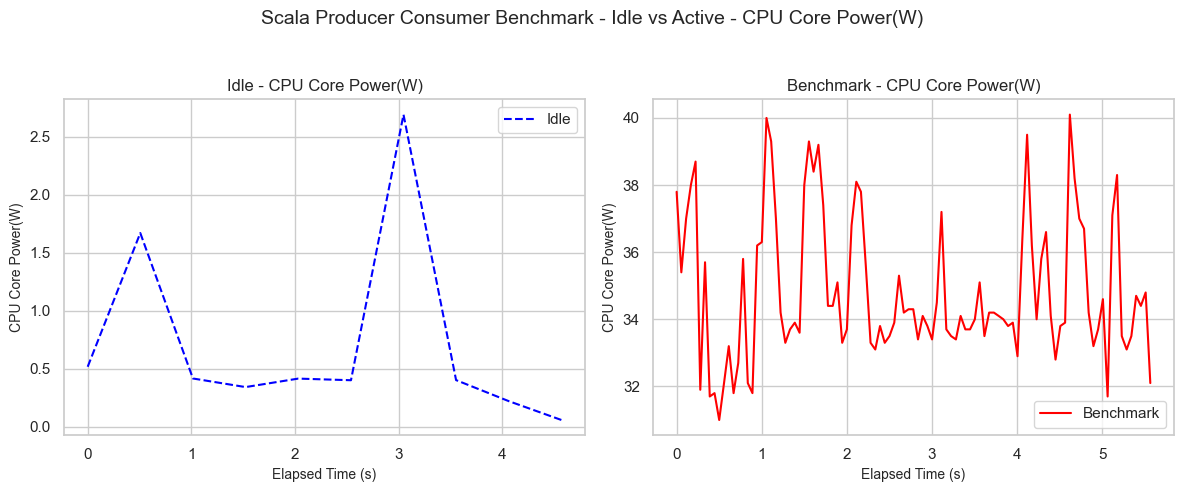

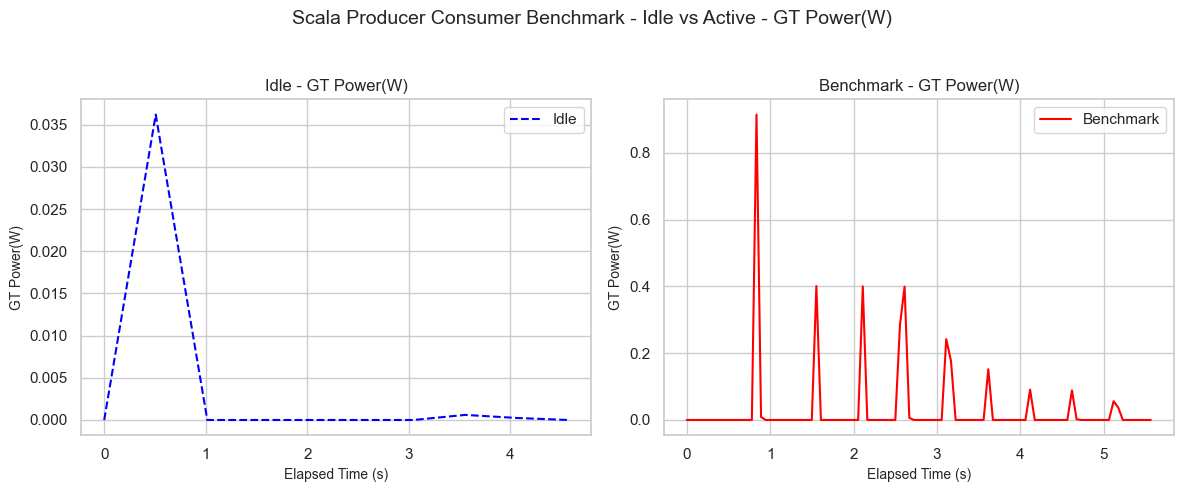

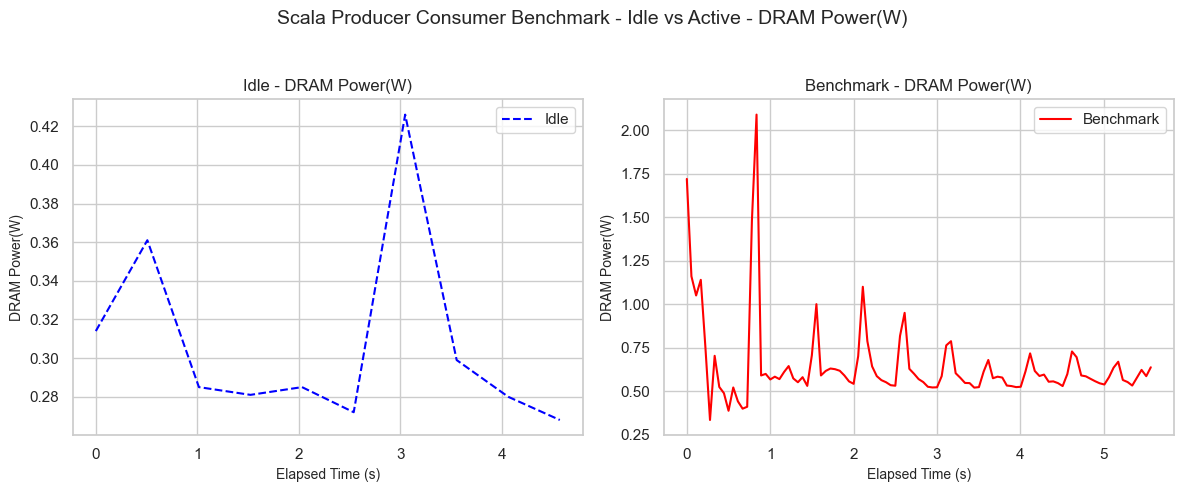

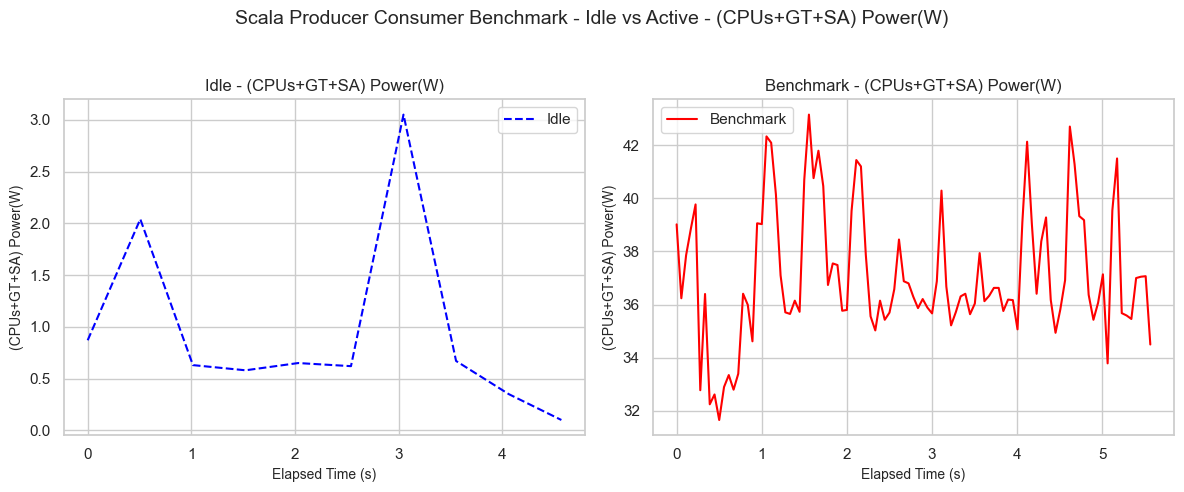

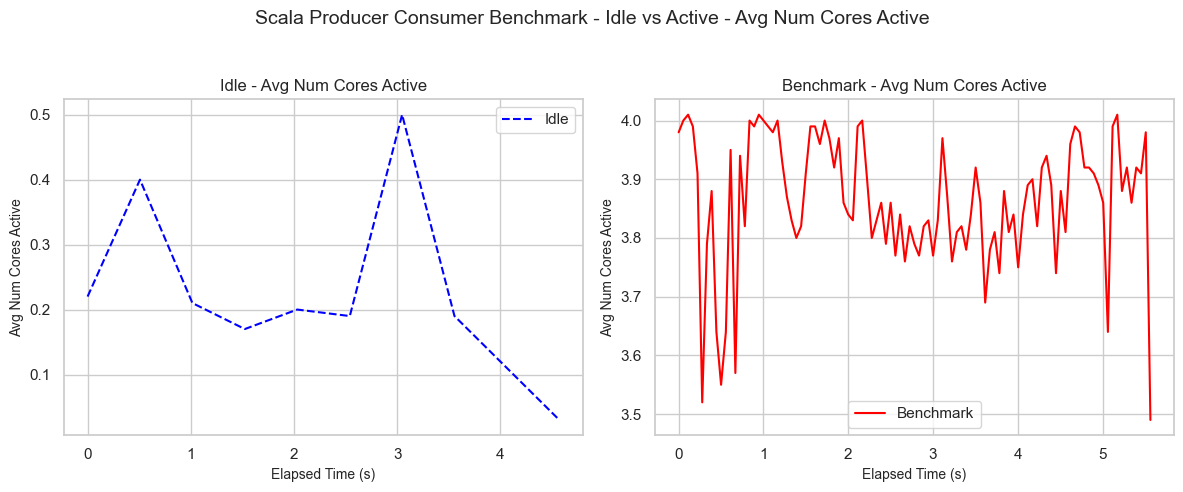

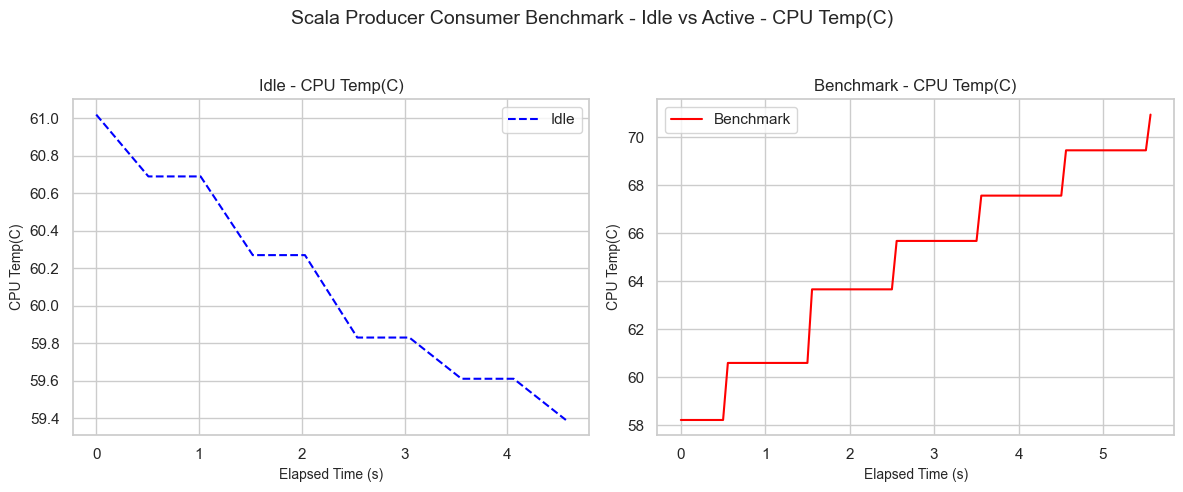

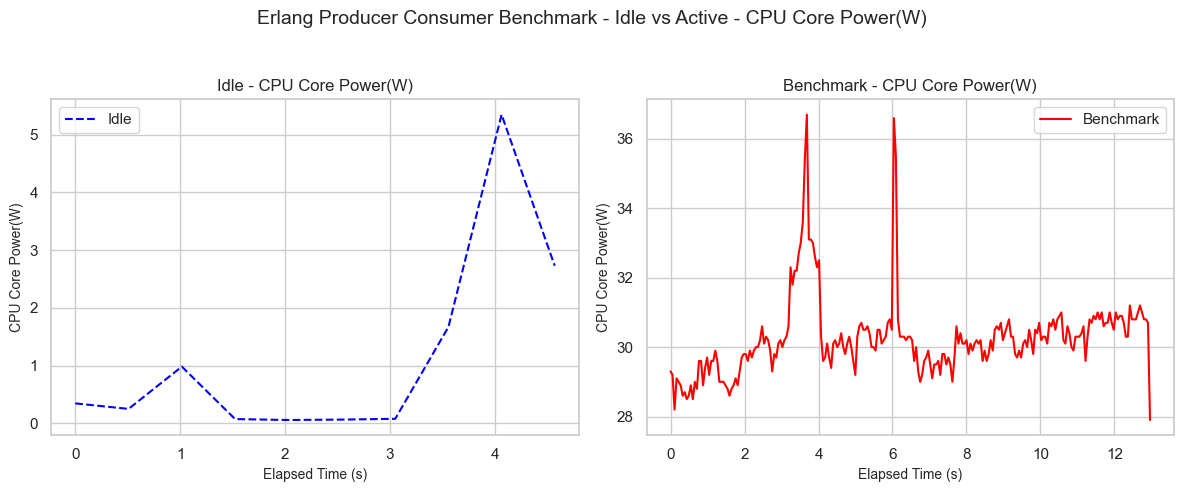

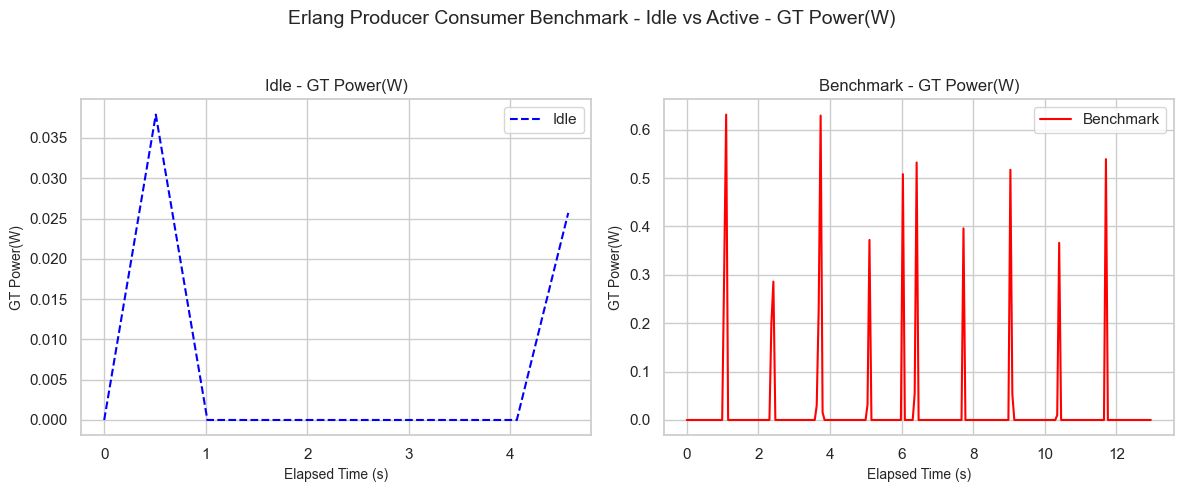

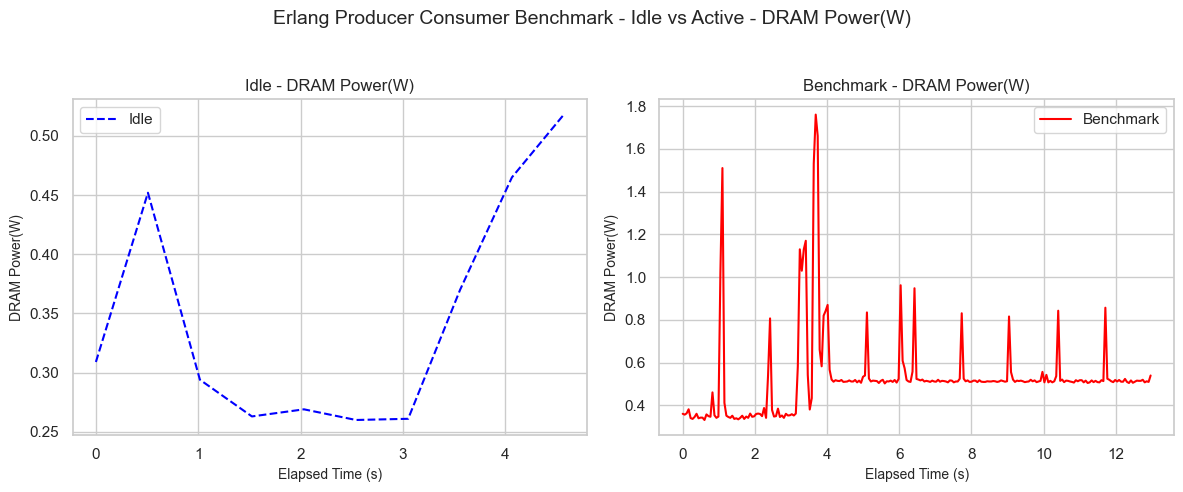

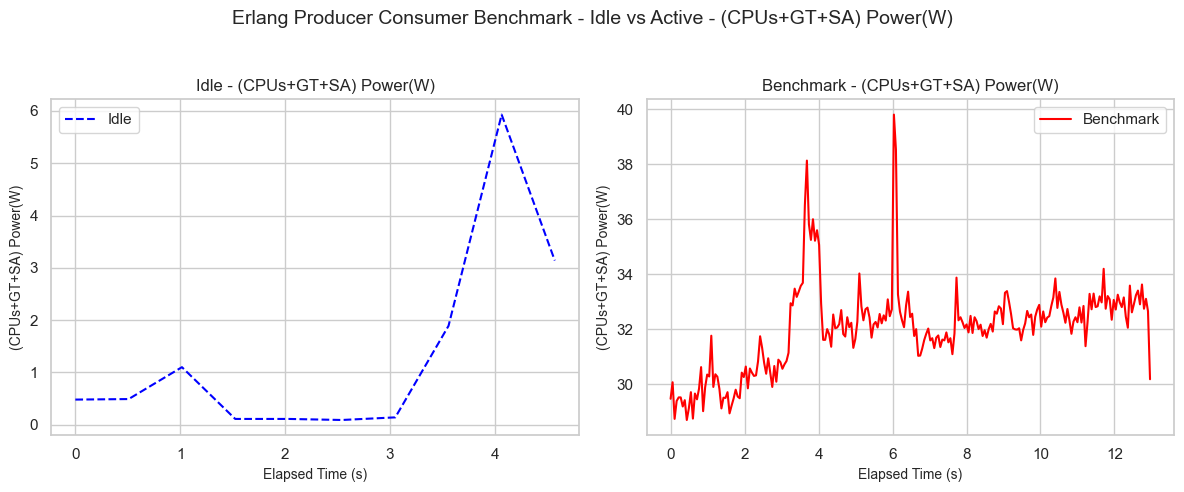

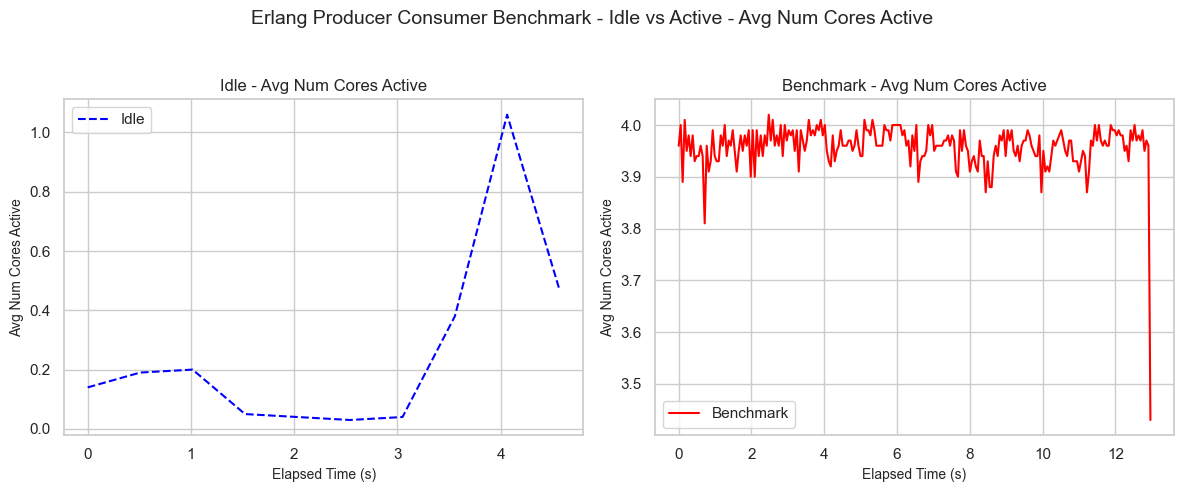

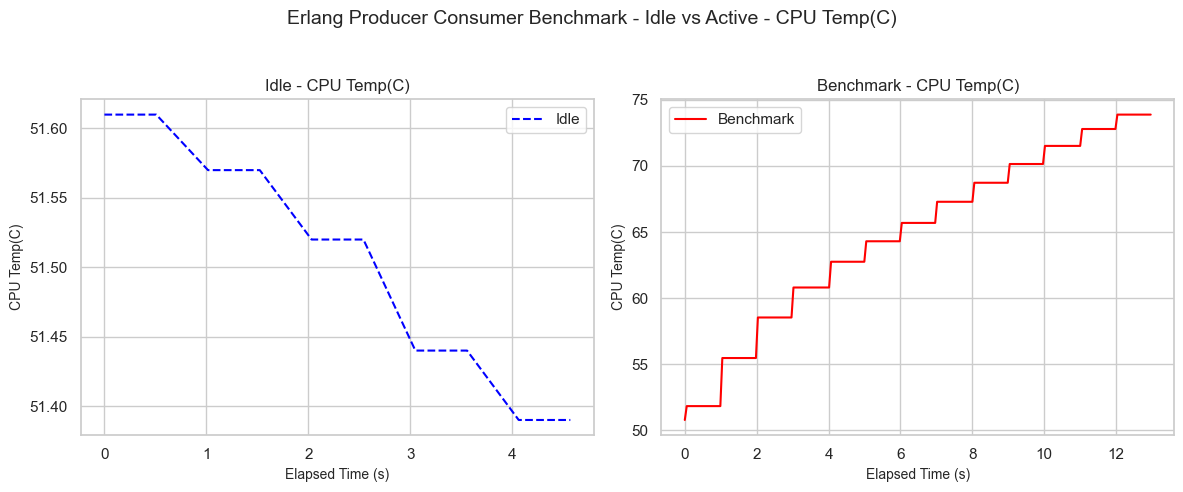

In [15]:
plot_graphs(scala_idle_data, scala_bench_data, "Scala Producer Consumer Benchmark - Idle vs Active")
plot_graphs(erlang_idle_data, erlang_bench_data, "Erlang Producer Consumer Benchmark - Idle vs Active")

In [16]:
def plot_erlang_vs_scala(erlang_df, scala_df, idle_erlang_df, idle_scala_df, title_prefix):
    """
    Plots Erlang and Scala benchmark data with elapsed time starting at t=0,
    after subtracting corresponding idle values.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    erlang_df = erlang_df.copy()
    scala_df = scala_df.copy()

    # Normalize elapsed time to start from t=0
    erlang_df["Elapsed Time (s)"] = (erlang_df["Time Elapsed (ms)"].cumsum() - erlang_df["Time Elapsed (ms)"].iloc[0]) / 1000
    scala_df["Elapsed Time (s)"] = (scala_df["Time Elapsed (ms)"].cumsum() - scala_df["Time Elapsed (ms)"].iloc[0]) / 1000


    for column in columns_to_plot:
        fig, ax = plt.subplots(figsize=(10, 5))

        # Subtract idle values
        erlang_df["Adjusted " + column] = np.maximum(0, erlang_df[column] - idle_erlang_df[column].mean())
        scala_df["Adjusted " + column] = np.maximum(0, scala_df[column] - idle_scala_df[column].mean())

        # Plot Erlang benchmark
        sns.lineplot(data=erlang_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Erlang", color='blue', ax=ax)

        # Plot Scala benchmark
        sns.lineplot(data=scala_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Scala", color='red', ax=ax)

        # Main figure title
        ax.set_title(f"{title_prefix} - {column}", fontsize=14)
        ax.set_xlabel("Elapsed Time (s)", fontsize=12)
        ax.set_ylabel(column, fontsize=12)
        ax.legend()
        ax.grid(True)

        plt.tight_layout()
        plt.show()

In [17]:
def format_number_str(nmsg):
    """Formats large numbers into shortened notation (e.g., 1B, 100M, 10M)."""
    if nmsg >= 1_000_000_000:
        return f"{nmsg // 1_000_000_000}B"
    elif nmsg >= 1_000_000:
        return f"{nmsg // 1_000_000}M"
    elif nmsg >= 1_000:
        return f"{nmsg // 1_000}K"
    return str(nmsg)

producers = format_number_str(NP)
consumers = format_number_str(NC)
item_per_producer = format_number_str(IPP)
buffer_size = format_number_str(BB)
title_config_prefix = f"({producers} Producers, {consumers} Consumers,{item_per_producer} Items, {buffer_size} Buffer Size, {ITERATIONS} Iterations)"

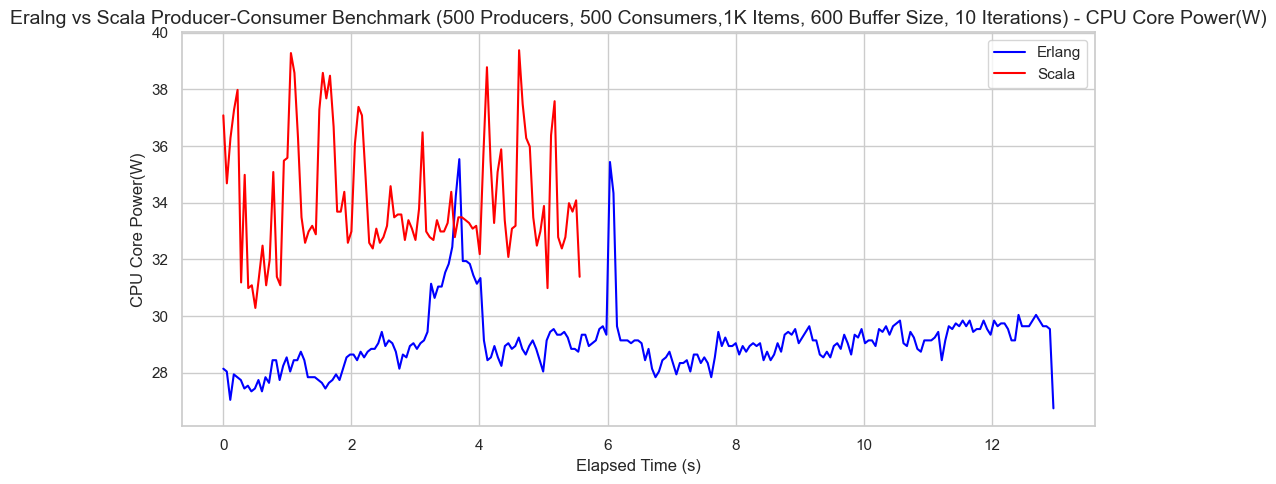

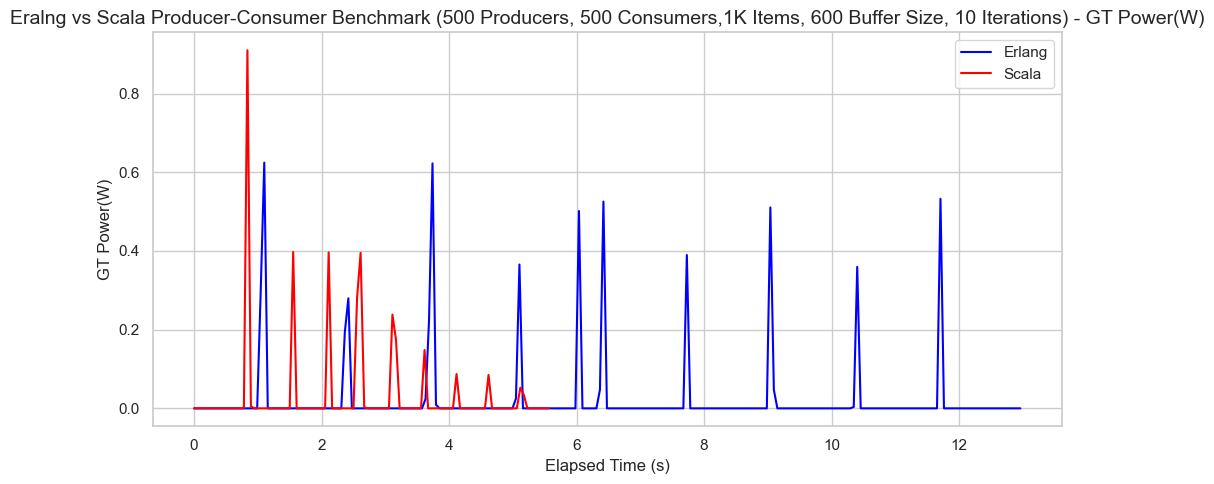

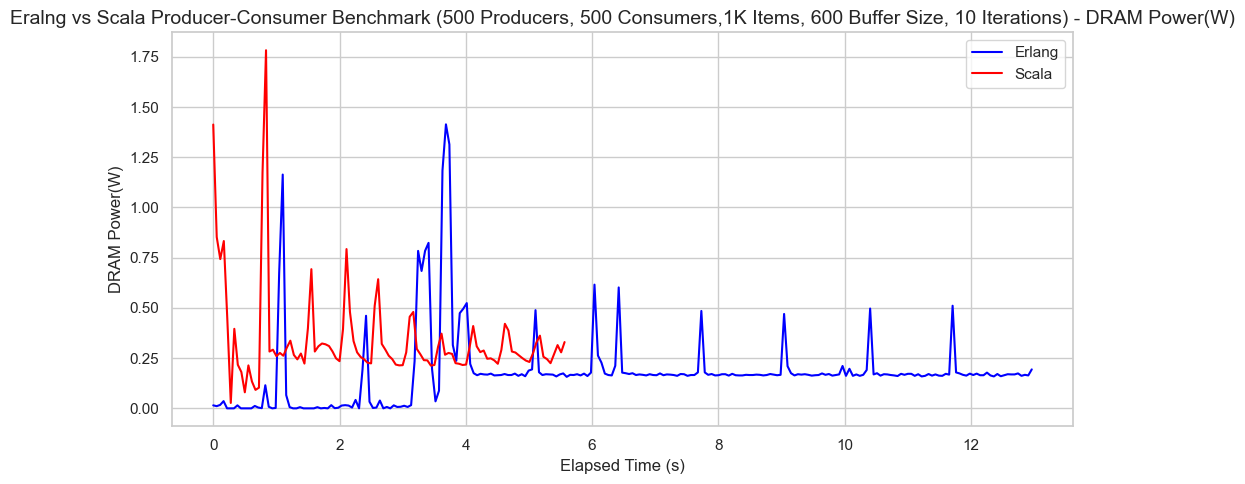

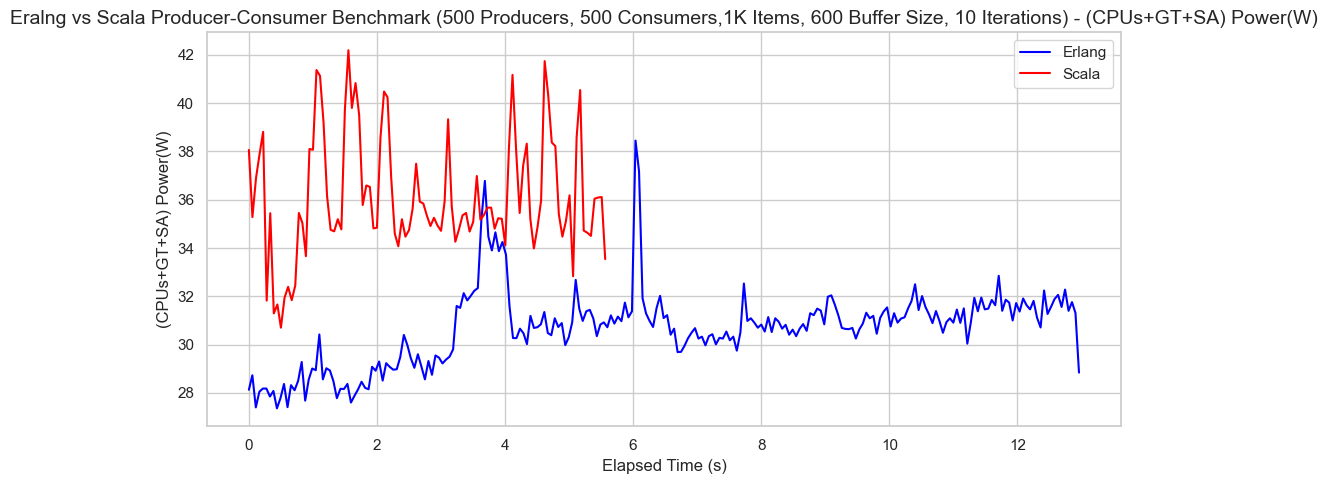

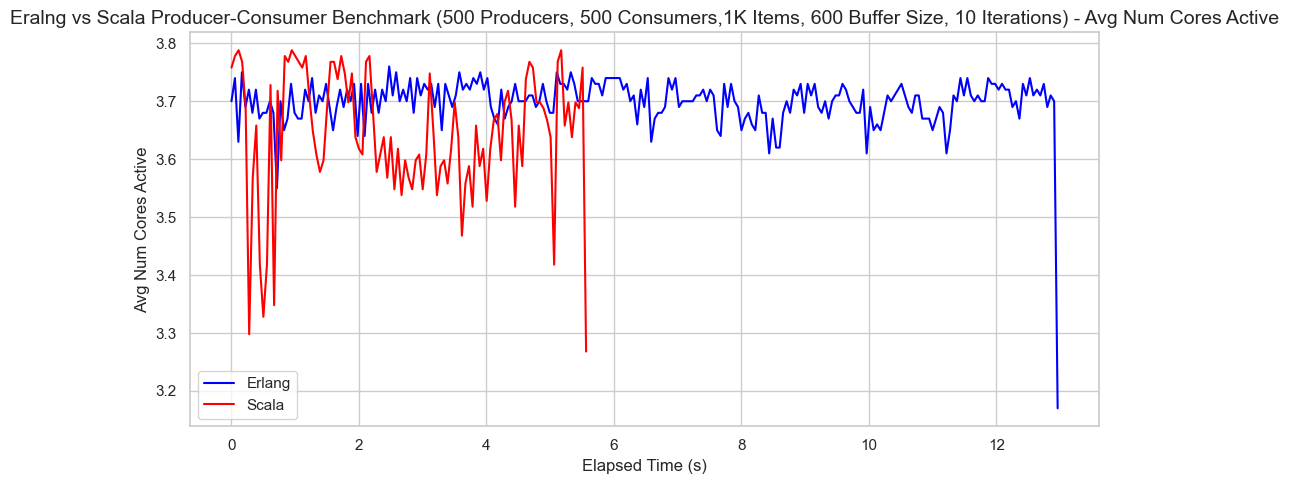

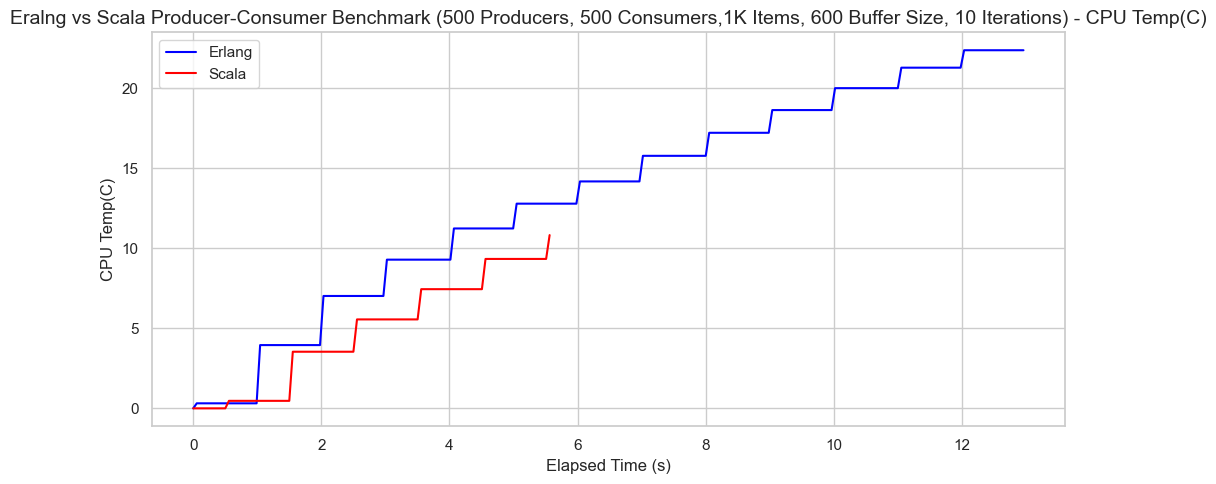

In [18]:
plot_erlang_vs_scala(erlang_bench_data, scala_bench_data, erlang_idle_data, scala_idle_data, f"Eralng vs Scala Producer-Consumer Benchmark {title_config_prefix}")


Compute Average Metrics

In [19]:
metrics_columns = ["CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", "(CPUs+GT+SA) Power(W)","CPU Temp(C)", "Avg Num Cores Active"]

In [20]:
# Compute mean idle values for each metric
scala_idle_means = scala_idle_data[metrics_columns].mean()
erlang_idle_means = erlang_idle_data[metrics_columns].mean()

# Subtract the mean idle values from each row in the benchmark data
scala_net_avgs = (scala_bench_data[metrics_columns] - scala_idle_means).mean()
erlang_net_avgs = (erlang_bench_data[metrics_columns] - erlang_idle_means).mean()

print("Net Average Metrics Comparison:\n")
print("Scala Benchmark:")
print(scala_net_avgs, "\n")
print("Erlang Benchmark:")
print(erlang_net_avgs)

Net Average Metrics Comparison:

Scala Benchmark:
CPU Core Power(W)        34.124554
GT Power(W)               0.028582
DRAM Power(W)             0.340514
(CPUs+GT+SA) Power(W)    36.129446
CPU Temp(C)               4.614941
Avg Num Cores Active      3.642059
dtype: float64 

Erlang Benchmark:
CPU Core Power(W)        29.100334
GT Power(W)               0.017597
DRAM Power(W)             0.180719
(CPUs+GT+SA) Power(W)    30.661580
CPU Temp(C)              13.357529
Avg Num Cores Active      3.698487
dtype: float64


Compute Total Energy Consumption

In [21]:
# Calculate total elapsed time
scala_total_time = scala_bench_data["Time Elapsed (ms)"].sum() / 1000
erlang_total_time = erlang_bench_data["Time Elapsed (ms)"].sum() / 1000

# Calculate total elapsed time using timestamps (convert to seconds)
# scala_total_time = (scala_bench_data["Timestamp"].iloc[-1] - scala_bench_data["Timestamp"].iloc[0]).total_seconds()
# erlang_total_time = (erlang_bench_data["Timestamp"].iloc[-1] - erlang_bench_data["Timestamp"].iloc[0]).total_seconds()

# Compute total energy consumption
# scala_total_energy = scala_net_avgs["(CPUs+GT+SA) Power(W)"] * scala_total_time
# erlang_total_energy = erlang_net_avgs["(CPUs+GT+SA) Power(W)"] * erlang_total_time

scala_total_energy = (scala_net_avgs["CPU Core Power(W)"] + scala_net_avgs["DRAM Power(W)"]) * scala_total_time
erlang_total_energy = (erlang_net_avgs["CPU Core Power(W)"] + erlang_net_avgs["DRAM Power(W)"]) * erlang_total_time


# Create a DataFrame for the new row
new_row = pd.DataFrame([{
    "Iterations": ITERATIONS,
    "NP": NP,
    "NC": NC,
    "IPP": IPP,
    "BB": BB,
    "Erlang Energy Consumption(J)": erlang_total_energy,
    "Scala Energy Consumption(J)": scala_total_energy
}])

# Define CSV file path
csv_filename = os.path.join(parent_dir, "aggregate_energy_results.csv")

# Check if the file exists
if os.path.exists(csv_filename):
    # Load existing data
    existing_data = pd.read_csv(csv_filename)
    
    # Check if the row with the same (Number of Messages, Iterations) already exists
    duplicate_row = existing_data[
        (existing_data["NC"] == NC) & 
        (existing_data["NP"] == NP) &
        (existing_data["IPP"] == IPP) &
        (existing_data["BB"] == BB) &
        (existing_data["Iterations"] == ITERATIONS)
    ]
    
    if not duplicate_row.empty:
        print("Skipping duplicate entry for NC =", NC, "NP =", NP, "IPP =", IPP, "BB =", BB, "and Iterations =", ITERATIONS)
    else:
        # Append new row
        new_row.to_csv(csv_filename, mode='a', header=False, index=False)
        print("Results appended to", csv_filename)
else:
    # Save with header if file does not exist
    new_row.to_csv(csv_filename, mode='w', header=True, index=False)
    print("File created and results saved to", csv_filename)

# Print the computed values
print("\nTotal Energy Consumption Comparison:")
print("Scala Benchmark:", scala_total_energy,"Joules")
print("Erlang Benchmark:", erlang_total_energy,"Joules")


Results appended to ../../../data/bnd_buffer/1/aggregate_energy_results.csv

Total Energy Consumption Comparison:
Scala Benchmark: 193.78122187399606 Joules
Erlang Benchmark: 381.2217461326892 Joules
